In [1]:
#Importing required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
import statsmodels.api as sm

#! pip install --upgrade category_encoders

In [2]:
# Importing Dataset 

df = pd.read_csv('/Users/gina/Desktop/ALY6020/adult-all.csv')

df


,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48836,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
48837,64,?,321403,HS-grad,9,Widowed,?,Other-relative,Black,Male,0,0,40,United-States,<=50K
48838,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
48839,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


In [3]:
df.head(5)

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [4]:
df.shape

(48841, 15)

# Data Cleaning

In [5]:
# Assigning proper names to columns

df.columns = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation',
             'relationship', 'race', 'sex', 'capital-gain', 'capital-loss','hours-per-week', 'native-country',
             'Salary']
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Salary
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48836,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
48837,64,?,321403,HS-grad,9,Widowed,?,Other-relative,Black,Male,0,0,40,United-States,<=50K
48838,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
48839,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


In [6]:
# Deleting duplicates from the dataset

print("Before removing duplicates: ",len(df))
df = df.drop_duplicates()
print("After removing duplicates: ",len(df))

#There are no duplicate rows in the dataset

Before removing duplicates:  48841
After removing duplicates:  48789


In [7]:
# checking for missing value

df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
Salary            0
dtype: int64

In [8]:
df = df.drop("fnlwgt", axis = 1)

df

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Salary
0,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48836,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
48837,64,?,HS-grad,9,Widowed,?,Other-relative,Black,Male,0,0,40,United-States,<=50K
48838,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
48839,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


In [9]:
# New Shape after dropping columns

df.shape



(48789, 14)

In [10]:
# Checking for bad values in the dataset

for col in df:
    print(col,": ", df[col].dtypes)
    print(df[col].unique())

age :  int64
[50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 39 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87 89]
workclass :  object
['Self-emp-not-inc' 'Private' 'State-gov' 'Federal-gov' 'Local-gov' '?'
 'Self-emp-inc' 'Without-pay' 'Never-worked']
education :  object
['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 'Assoc-voc' '7th-8th' 'Doctorate' 'Prof-school' '5th-6th' '10th'
 '1st-4th' 'Preschool' '12th']
education-num :  int64
[13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8]
marital-status :  object
['Married-civ-spouse' 'Divorced' 'Married-spouse-absent' 'Never-married'
 'Separated' 'Married-AF-spouse' 'Widowed']
occupation :  object
['Exec-managerial' 'Handlers-cleaners' 'Prof-specialty' 'Other-service'
 'Adm-clerical' 'Sales' 'Craft-repair' 'Transport-moving'
 'Farming-fishing' 'Machine-op-inspct' 'Tech-support' '?'
 'Prote

In [11]:
# % of data points containing '?' 

cols = ["native-country", "occupation", "workclass"]

np.sum((df[cols]=="?").any(axis="columns"))/len(df)*100

7.40945704974482

In [12]:
 # Deleting all records with ? in the column

df = df[~df.isin(['?']).any(axis=1)]
df


,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Salary
0,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48835,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
48836,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
48838,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
48839,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


# EDA

In [13]:
df.describe()

,age,education-num,capital-gain,capital-loss,hours-per-week
count,45174.000000,45174.000000,45174.000000,45174.000000,45174.000000
mean,38.556161,10.119250,1102.552552,88.689556,40.942533
std,13.215495,2.551732,7510.331312,405.160881,12.007862
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


<AxesSubplot:>

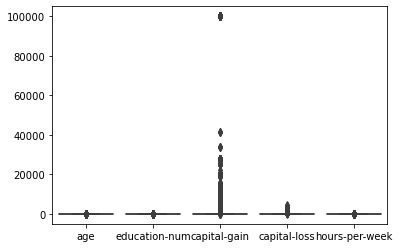

In [14]:
# Boxplot to check outliers

sns.boxplot(data = df)

<AxesSubplot:>

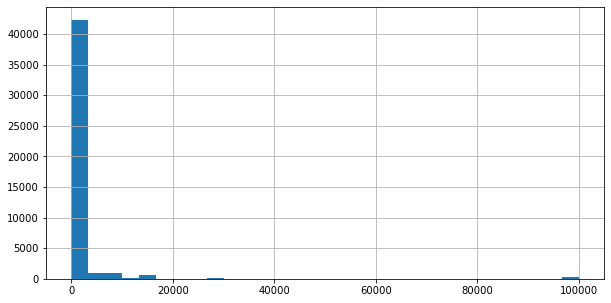

In [15]:
# Zooming in on the variable that has outliers

fig = plt.figure(figsize = (10,5))
ax = fig.gca()
df["capital-gain"].hist(bins=30, ax = ax)

<AxesSubplot:>

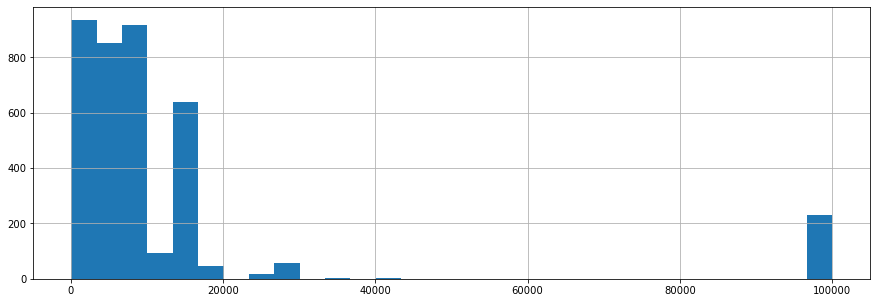

In [16]:
# Removing the 0 and plotting the hist to look at the distribution

df_capital_gains = df.loc[(df["capital-gain"] > 0)]

fig = plt.figure(figsize = (15,5))
ax = fig.gca()
df_capital_gains["capital-gain"].hist(bins=30, ax = ax)

<AxesSubplot:>

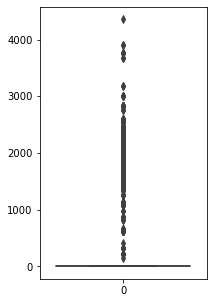

In [17]:
# Box plot for capital-loss

fig = plt.figure(figsize = (3,5))
ax = fig.gca()
sns.boxplot(data = df['capital-loss'],ax = ax)

<AxesSubplot:>

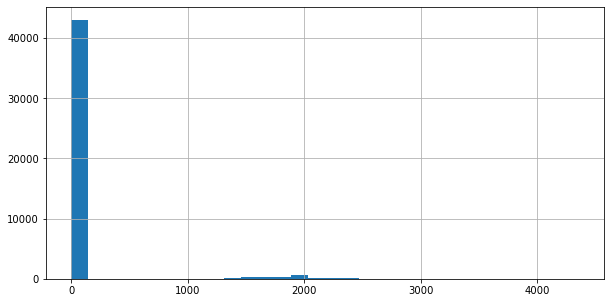

In [18]:
# Zooming in on where the outliers are

fig = plt.figure(figsize = (10,5))
ax = fig.gca()
df["capital-loss"].hist(bins=30, ax = ax)

<AxesSubplot:>

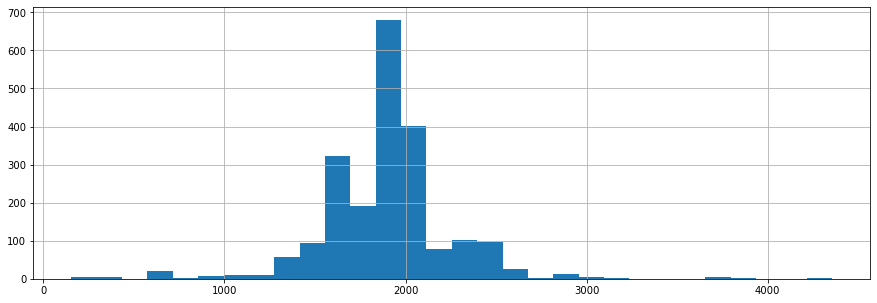

In [19]:
# Removing 0s and checking the distribution

df_capital_loss = df.loc[(df["capital-loss"] > 0)]

fig = plt.figure(figsize = (15,5))
ax = fig.gca()
df_capital_loss["capital-loss"].hist(bins=30, ax = ax)

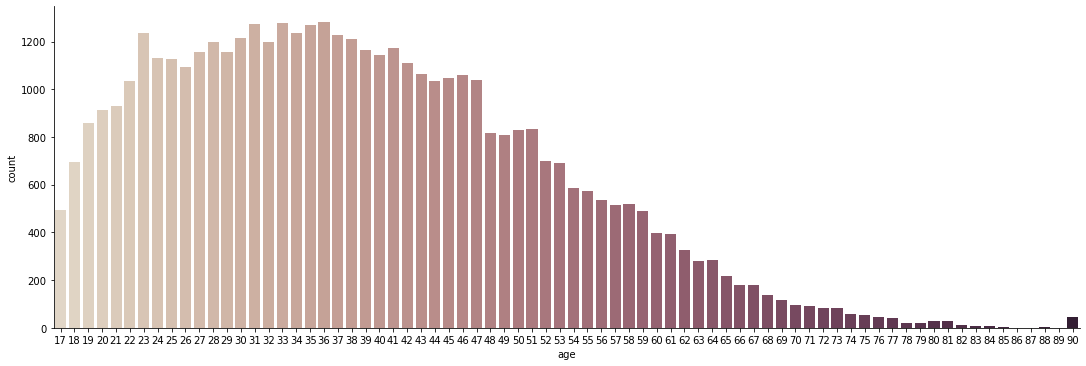

In [20]:
# Checking the age variable

sns.catplot(x="age", kind="count", palette="ch:.25",height=5, aspect=3, data=df)

<AxesSubplot:xlabel='hours-per-week', ylabel='Count'>

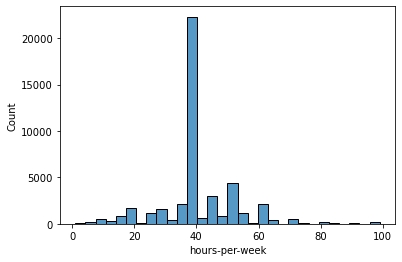

In [21]:
# Checking the hours worked per week variable

sns.histplot(x="hours-per-week",bins= 30,data=df)

In [22]:
# Checking the education related variables

education_number = df.groupby(['education', 'education-num']).size()
education_number

education     education-num
10th          6                 1223
11th          7                 1619
12th          8                  575
1st-4th       2                  220
5th-6th       3                  447
7th-8th       4                  822
9th           5                  676
Assoc-acdm    12                1507
Assoc-voc     11                1958
Bachelors     13                7558
Doctorate     16                 544
HS-grad       9                14770
Masters       14                2513
Preschool     1                   70
Prof-school   15                 785
Some-college  10                9887
dtype: int64

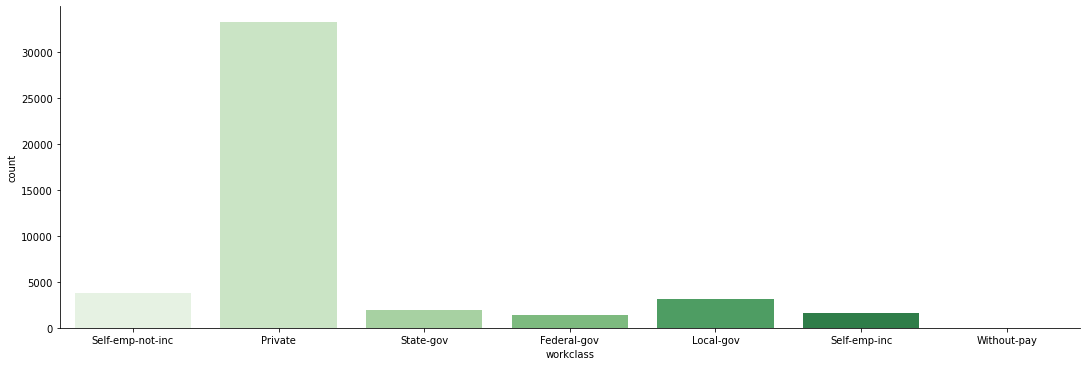

In [23]:
# Checking the employment type 

sns.catplot(x="workclass", kind="count", palette="Greens",height=5, aspect=3, data=df)

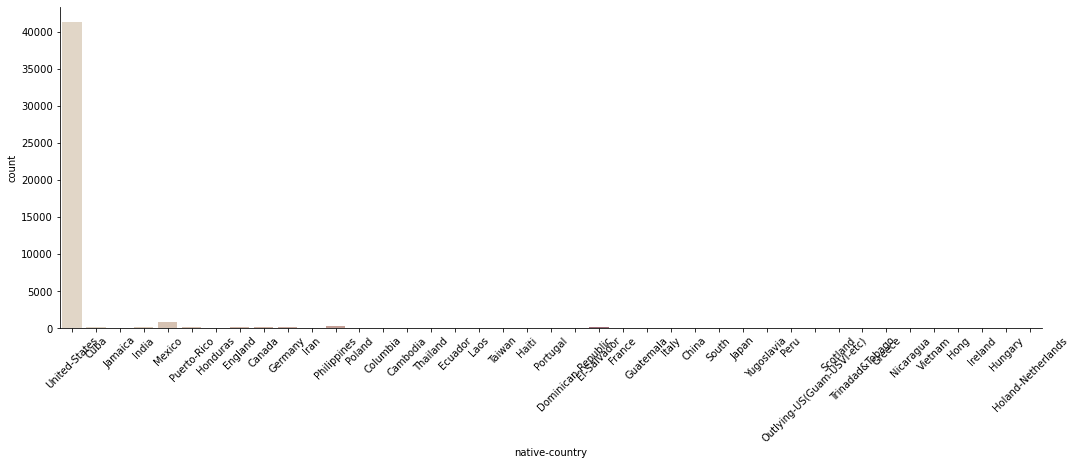

In [24]:
#Checking the Native country variable 

country = sns.catplot(x="native-country", kind="count", palette="ch:.25",height=5, aspect=3, data=df)
country.set_xticklabels(rotation=45)

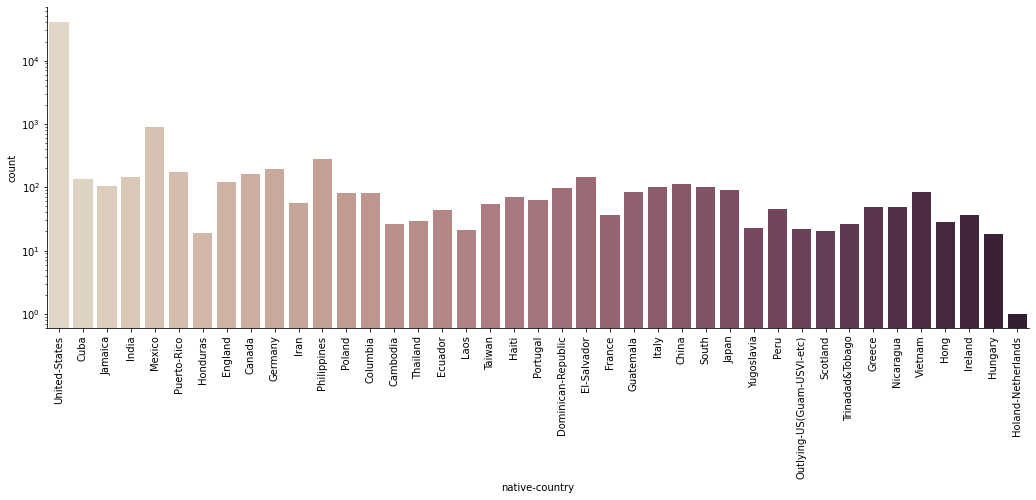

In [25]:
# Using log to understand the distribution of the variable Native country
country = sns.catplot(x="native-country", kind="count", palette="ch:.25",height=5, aspect=3, data=df)
country.set(yscale = 'log')
country.set_xticklabels(rotation=90)

In [26]:
#Percentage of data points with USA has their Native country

np.sum(df['native-country']=="United-States")/len(df['native-country'])*100

91.32465577544605

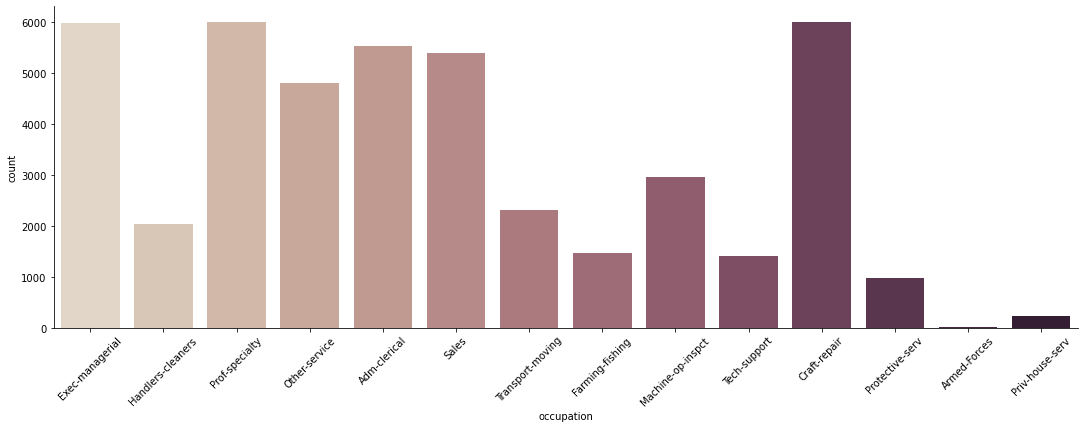

In [27]:
# Checking the occupation variable

occupation = sns.catplot(x="occupation", kind="count", palette="ch:.25",height=5, aspect=3, data=df)
occupation.set_xticklabels(rotation=45)

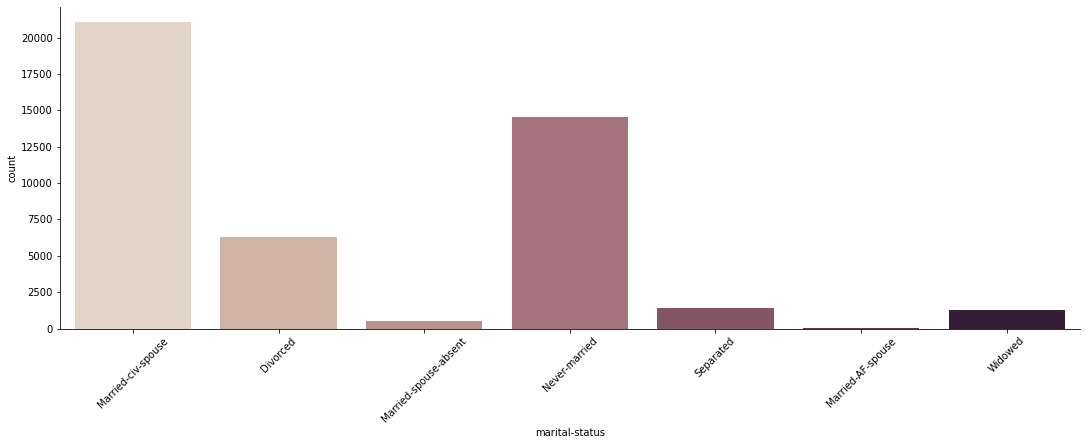

In [28]:
#Checking the variable marital-status

marriage= sns.catplot(x="marital-status", kind="count", palette="ch:.25",height=5, aspect=3, data=df)
marriage.set_xticklabels(rotation=45)

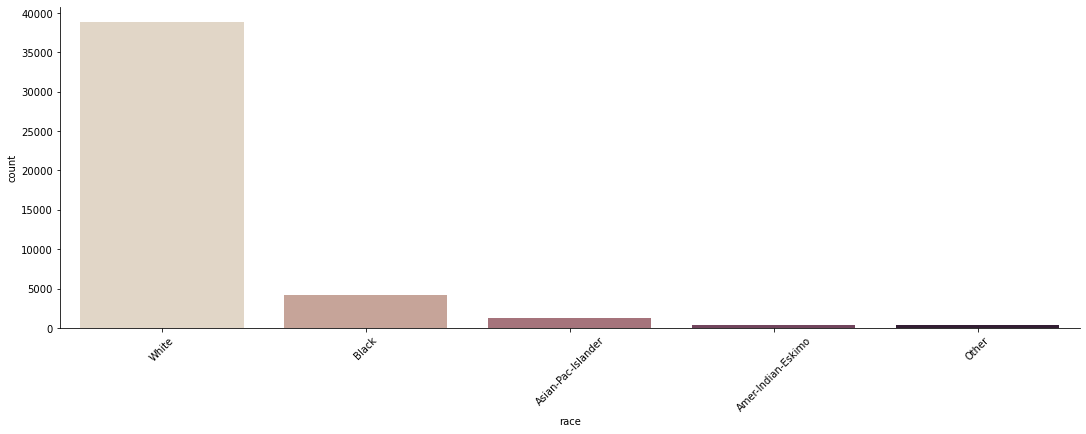

In [29]:
# Checking race

race= sns.catplot(x="race", kind="count", palette="ch:.25",height=5, aspect=3, data=df)
race.set_xticklabels(rotation=45)

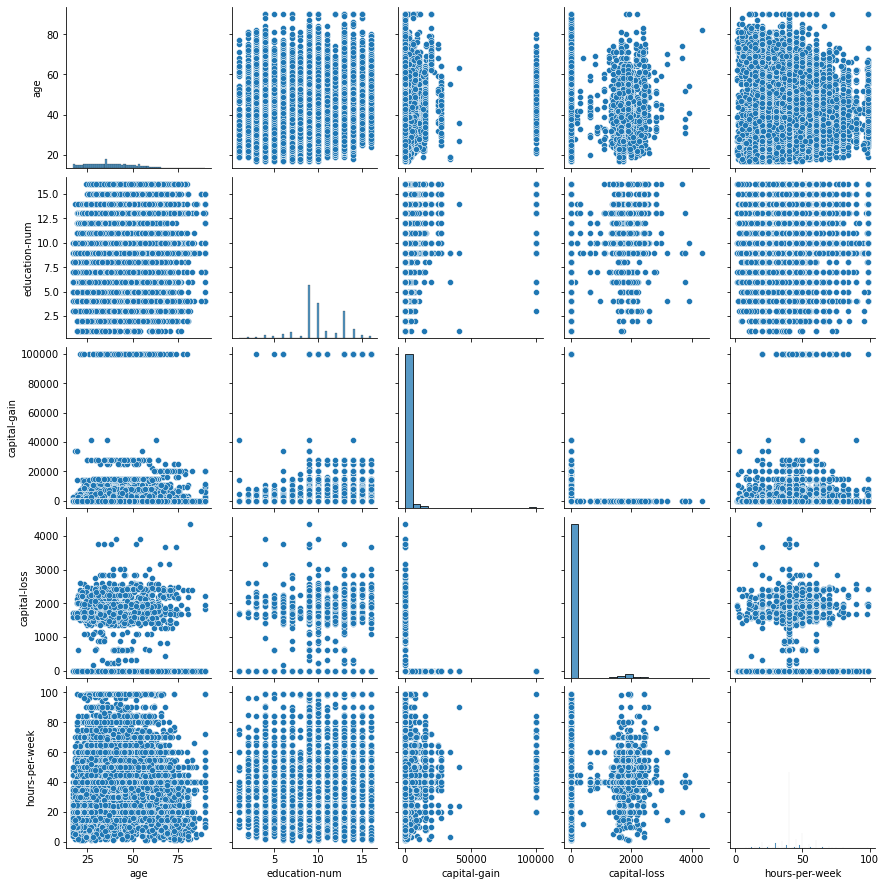

In [30]:
# Plotting all the numerical variables together to check the distribution

sns.pairplot(df)

<AxesSubplot:>

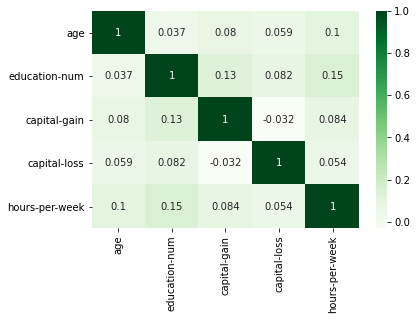

In [31]:
corr  = df.corr()
sns.heatmap(corr, cmap="Greens", annot=True)

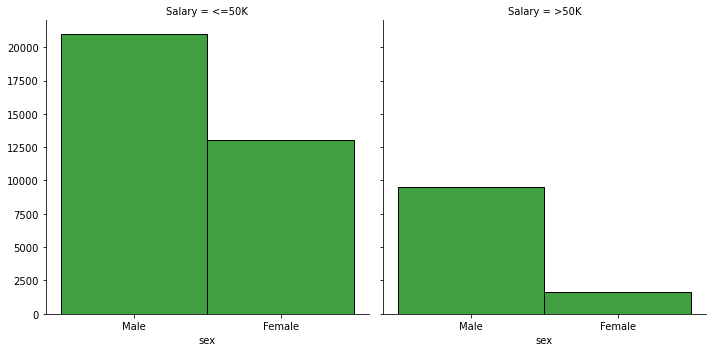

In [32]:
# Relation between sex and salary bracket

salary_sex = sns.FacetGrid(data=df,col='Salary', height=5, aspect=1)
salary_sex.map(sns.histplot,'sex',color='Green')
plt.show()

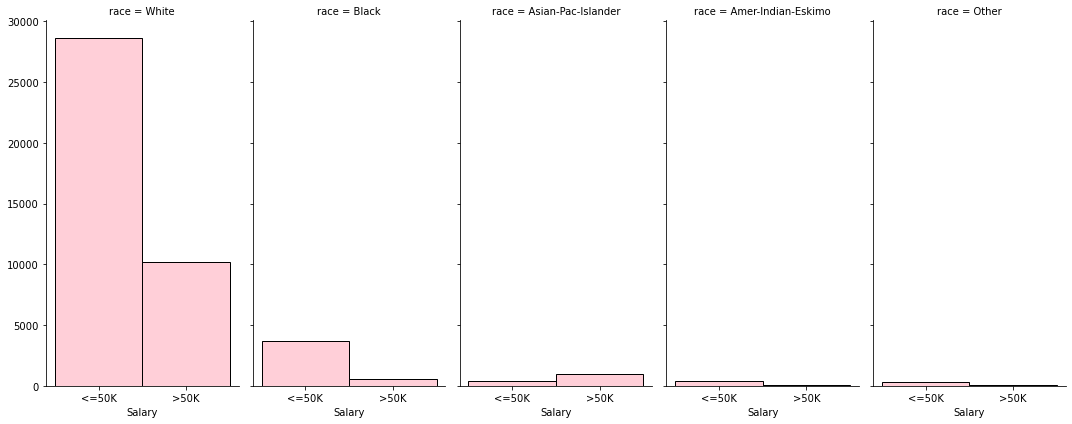

In [33]:
# Relation between salary and race

salary_race = sns.FacetGrid(data = df,col='race',height=6, aspect=0.5)
salary_race.map(sns.histplot,'Salary',color='Pink')
plt.show()

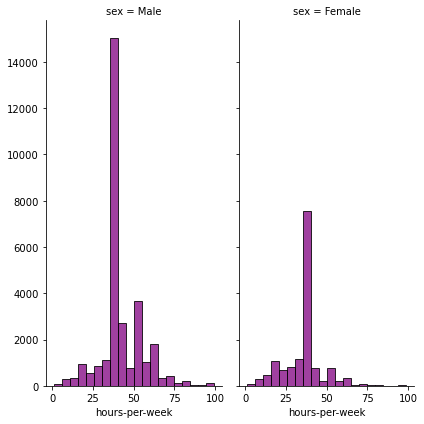

In [34]:
# Relation between sex and hours worked per week

sex_hours = sns.FacetGrid(data = df,col='sex',height=6, aspect=0.5)
sex_hours.map(sns.histplot,'hours-per-week',color='Purple', bins=20)
plt.show()

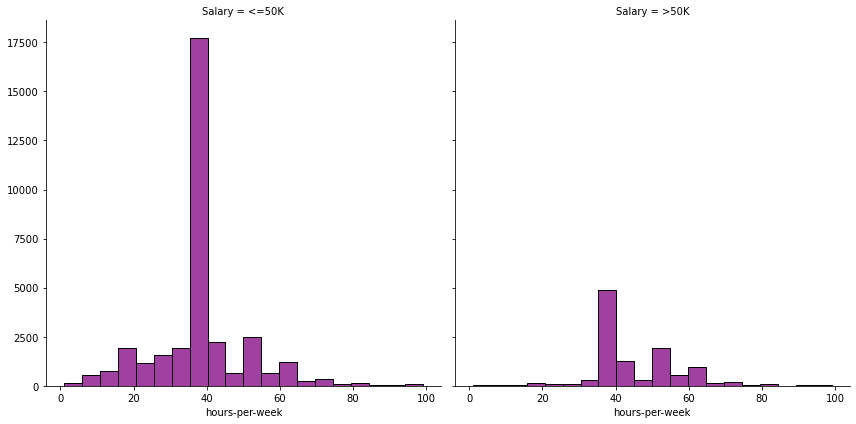

In [35]:
salary_hours = sns.FacetGrid(data = df,col='Salary',height=6, aspect=1)
salary_hours.map(sns.histplot,'hours-per-week',color='Purple', bins=20)
plt.show()

## Nearest Neighbor approch

In [36]:
import category_encoders as ce
encoder = ce.OrdinalEncoder(cols = df.columns)
  
# Encoding values for our model and converting into dataframe
df_category_encoder = encoder.fit_transform( df )
  
display(df_category_encoder)

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Salary
0,1,1,1,1,1,1,1,1,1,1,1,1,1,1
1,2,2,2,2,2,2,2,1,1,1,1,2,1,1
2,3,2,3,3,1,2,1,2,1,1,1,2,1,1
3,4,2,1,1,1,3,3,2,2,1,1,2,2,1
4,5,2,4,4,1,1,3,1,2,1,1,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48835,39,2,1,1,4,3,4,1,1,1,1,2,1,1
48836,22,2,1,1,2,3,2,1,2,1,1,26,1,1
48838,2,2,1,1,1,3,1,1,1,1,1,5,1,1
48839,30,2,1,1,2,5,4,3,1,63,1,2,1,1


In [37]:
# Splitting dependent and indepdendant variable

X = df_category_encoder.iloc[:, :-1].values
y = df_category_encoder.iloc[:, -1].values

In [38]:
# Divide into train and test set into 80:20 

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [39]:
# Scaling the data training data for better results
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [40]:
# Knn with K=5
from sklearn.neighbors import KNeighborsClassifier
classifier_5= KNeighborsClassifier(n_neighbors = 5)
classifier_5.fit(X_train, y_train)

KNeighborsClassifier()

In [41]:
y_pred_5 = classifier_5.predict(X_test)

In [42]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred_5))
print(confusion_matrix(y_test, y_pred_5))

              precision    recall  f1-score   support

           1       0.86      0.91      0.88      6859
           2       0.65      0.54      0.59      2176

    accuracy                           0.82      9035
   macro avg       0.75      0.72      0.74      9035
weighted avg       0.81      0.82      0.81      9035

[[6213  646]
 [1001 1175]]


In [43]:
# Knn with K=7
from sklearn.neighbors import KNeighborsClassifier
classifier_7= KNeighborsClassifier(n_neighbors = 7)
classifier_7.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [44]:
y_pred_7 = classifier_7.predict(X_test)

In [45]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred_7))
print(confusion_matrix(y_test, y_pred_7))

              precision    recall  f1-score   support

           1       0.86      0.91      0.88      6859
           2       0.65      0.53      0.59      2176

    accuracy                           0.82      9035
   macro avg       0.76      0.72      0.74      9035
weighted avg       0.81      0.82      0.81      9035

[[6242  617]
 [1018 1158]]


In [46]:
# Knn with K=10
from sklearn.neighbors import KNeighborsClassifier
classifier_10= KNeighborsClassifier(n_neighbors = 10)
classifier_10.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [47]:
y_pred_10 = classifier_10.predict(X_test)

In [48]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred_10))
print(confusion_matrix(y_test, y_pred_10))

              precision    recall  f1-score   support

           1       0.85      0.94      0.89      6859
           2       0.70      0.46      0.56      2176

    accuracy                           0.82      9035
   macro avg       0.77      0.70      0.72      9035
weighted avg       0.81      0.82      0.81      9035

[[6425  434]
 [1171 1005]]
